In [1]:
1+1

2

In [2]:
b = 2

In [3]:
b + b

4

# Data Analysis Notebook Introduction

this is a markdown cell, in here I am creating text to format my notebook.

In this cell I can add links to [how to improve your markdown writing](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax#links)

![donkey and pig image](donkey_pig.jpg)

# NumPy

NumPy is a powerful library for performing data analysis

In [4]:
import numpy as np # canonical import

In [5]:
my_list = [[1, 2, 3], [4, 5, 6]]

display(type(my_list))
my_list

list

[[1, 2, 3], [4, 5, 6]]

In [6]:
my_array = np.array([[1.1, 2, 3], [4, 5, 6]])

display(type(my_array))
my_array

numpy.ndarray

array([[1.1, 2. , 3. ],
       [4. , 5. , 6. ]])

---
Exploring Attributes

In [7]:
my_array.ndim

2

In [8]:
my_array.shape

(2, 3)

In [9]:
my_array.size

6

In [10]:
my_array.dtype

dtype('float64')

## Slicing

🤔 How can we select specific values from a **ROW** ?

In [11]:
data_list = [
    [ 0,  1,  2,  3,  4],
    [10, 11, 12, 13, 14],
    [20, 21, 22, 23, 24],
    [30, 31, 32, 33, 34],
    [40, 41, 42, 43, 44],
]

data_np = np.array(data_list)
data_np

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [12]:
# pure Python
data_list[2][1:4]

[21, 22, 23]

In [13]:
# using NumPy
data_np[2,1:4]

array([21, 22, 23])

🤔 How can we select specific values from a **COLUMN** ?

In [14]:
# Pure Python
selection = []

for index, row in enumerate(data_list):
    if index > 0:
        selection.append(row[4])

selection

[14, 24, 34, 44]

In [15]:
# using NumPy
data_np[1:,4]

array([14, 24, 34, 44])

In [16]:
array = np.arange(0, 10)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

---
General Syntax

array[**start:stop** *:step*]

In [17]:
array[1:11:2]

array([1, 3, 5, 7, 9])

## Vectorized Operations

In [18]:
my_list = [
    [6, 5],
    [1, 3],
    [5, 6],
    [1, 4],
    [3, 7],
    [5, 8],
    [3, 5],
    [8, 4],
]

In [19]:
# Pure Python
sums = []

for row in my_list:
    sums.append(row[0]+row[1])

sums

[11, 4, 11, 5, 10, 13, 8, 12]

In [20]:
my_np = np.array(my_list)

In [21]:
# Using NumPy
my_np[:,0] + my_np[:,1]

array([11,  4, 11,  5, 10, 13,  8, 12])

In [22]:
my_np.sum(axis=1)

array([11,  4, 11,  5, 10, 13,  8, 12])

In [23]:
# 2D-array of shape (10_000, 10_000) with random floats in the interval [0, 1]. That's 100M numbers!
my_array = np.random.rand(10000, 10000)
array_list = my_array.tolist()
my_array.size

100000000

In [24]:
%%time
total = 0

for row in array_list:
    for number in row:
        total += number

round(total, 2)

CPU times: user 8.81 s, sys: 1.46 s, total: 10.3 s
Wall time: 11.2 s


49995936.12

In [25]:
%%time
round(np.sum(my_array), 2)

CPU times: user 49.2 ms, sys: 186 ms, total: 235 ms
Wall time: 252 ms


49995936.12

## Boolean Index

In [26]:
my_np[my_np > 4]

array([6, 5, 5, 6, 7, 5, 8, 5, 8])

# Pandas

Manipulating data of many different types

In [27]:
import pandas as pd # canonical import

## Data Series

Used to define a single column of data

In [28]:
my_series = pd.Series(data=[1, 2, 'three'])
# my_series = pd.Series({'id1': 1, 'id2': 2, 'id3': 'three'})

my_series

0        1
1        2
2    three
dtype: object

## DataFrame

Creates a series of columns

In [29]:
# df = pd.DataFrame(
#     [[4, 7, 10],
#     [5, 8, 11],
#     [6, 9, 12]],
#     # index=['row_1', 'row_2', 'row_3'],
#     columns=['col_a', 'col_b', 'col_c']
# )
df = pd.DataFrame(
    {'col_a':[4, 7, 10],
    'col_b':[5, 8, 11],
    'col_c':[6, 9, 12]}
)
df

,col_a,col_b,col_c
0,4,5,6
1,7,8,9
2,10,11,12


In [30]:
apples  = pd.Series(data=[1, 2, 3], index=['id1', 'id2', 'id3'])
oranges = pd.Series(data=[4, 5, 6], index=['id1', 'id2', 'id3'])

oranges

id1    4
id2    5
id3    6
dtype: int64

---
Creating a DataFrame from two Series

In [31]:
fruits = pd.DataFrame({
    'apples':apples,
    'oranges':oranges
})
fruits

,apples,oranges
id1,1,4
id2,2,5
id3,3,6


In [32]:
display(type(fruits['oranges']))
fruits['oranges']

pandas.core.series.Series

id1    4
id2    5
id3    6
Name: oranges, dtype: int64

In [33]:
display(type(fruits[['oranges']]))
fruits[['oranges']]

pandas.core.frame.DataFrame

,oranges
id1,4
id2,5
id3,6


# Exploratory Data Analysis

Taking a look at some global data

In [34]:
countries_df = pd.read_csv('countries.csv',decimal=',')

countries_df.head(5)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [35]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [36]:
countries_df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [37]:
countries_df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [38]:
countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [39]:
countries_df.tail(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
217,Vanuatu,OCEANIA,208869,12200,17.1,20.72,0.00,55.16,2900.0,53.0,32.6,2.46,7.38,90.16,2.0,22.72,7.82,0.260,0.120,0.620
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910,56.9,9.84,-8.94,8.03,17200.0,NaN,652.8,11.76,2.94,85.30,2.0,13.96,6.43,0.010,0.190,0.800
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,NaN,NaN,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [40]:
display(type(countries_df['Country']))
countries_df['Country']

pandas.core.series.Series

0         Afghanistan 
1             Albania 
2             Algeria 
3      American Samoa 
4             Andorra 
            ...       
222         West Bank 
223    Western Sahara 
224             Yemen 
225            Zambia 
226          Zimbabwe 
Name: Country, Length: 227, dtype: object

In [41]:
display(type(countries_df[['Country']]))
countries_df[['Country', 'Region']]

pandas.core.frame.DataFrame

,Country,Region
0,Afghanistan,ASIA (EX. NEAR EAST)
1,Albania,EASTERN EUROPE
2,Algeria,NORTHERN AFRICA
3,American Samoa,OCEANIA
4,Andorra,WESTERN EUROPE
...,...,...
222,West Bank,NEAR EAST
223,Western Sahara,NORTHERN AFRICA
224,Yemen,NEAR EAST
225,Zambia,SUB-SAHARAN AFRICA


In [42]:
countries_df.loc[10:15,['Country', 'Region']]

,Country,Region
10,Aruba,LATIN AMER. & CARIB
11,Australia,OCEANIA
12,Austria,WESTERN EUROPE
13,Azerbaijan,C.W. OF IND. STATES
14,"Bahamas, The",LATIN AMER. & CARIB
15,Bahrain,NEAR EAST


In [43]:
countries_df.iloc[10:15,0:2]

,Country,Region
10,Aruba,LATIN AMER. & CARIB
11,Australia,OCEANIA
12,Austria,WESTERN EUROPE
13,Azerbaijan,C.W. OF IND. STATES
14,"Bahamas, The",LATIN AMER. & CARIB


**Countries with more than a billion people**

In [44]:
countries_df[countries_df['Population'] > 1_000_000_000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.4,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.4,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538


**Countries in the Americas**

In [45]:
american = countries_df['Region'].str.contains('AMER')

In [46]:
countries_df[american]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
6,Anguilla,LATIN AMER. & CARIB,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547
10,Aruba,LATIN AMER. & CARIB,71891,193,372.5,35.49,0.00,5.89,28000.0,97.0,516.1,10.53,0.00,89.47,2.0,11.03,6.68,0.004,0.333,0.663
14,"Bahamas, The",LATIN AMER. & CARIB,303770,13940,21.8,25.41,-2.20,25.21,16700.0,95.6,460.6,0.80,0.40,98.80,2.0,17.57,9.05,0.030,0.070,0.900
17,Barbados,LATIN AMER. & CARIB,279912,431,649.5,22.51,-0.31,12.50,15700.0,97.4,481.9,37.21,2.33,60.46,2.0,12.71,8.67,0.060,0.160,0.780
20,Belize,LATIN AMER. & CARIB,287730,22966,12.5,1.68,0.00,25.69,4900.0,94.1,115.7,2.85,1.71,95.44,2.0,28.84,5.72,0.142,0.152,0.612
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
24,Bolivia,LATIN AMER. & CARIB,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,0.19,97.14,1.5,23.30,7.53,0.128,0.352,0.520
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516


**European Countries**

In [47]:
countries_df[countries_df['Region'].isin(['WESTERN EUROPE', 'EASTERN EUROPE'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [48]:
countries_df['Region'].unique()

array(['ASIA (EX. NEAR EAST)         ',
       'EASTERN EUROPE                     ',
       'NORTHERN AFRICA                    ',
       'OCEANIA                            ',
       'WESTERN EUROPE                     ',
       'SUB-SAHARAN AFRICA                 ', 'LATIN AMER. & CARIB    ',
       'C.W. OF IND. STATES ', 'NEAR EAST                          ',
       'NORTHERN AMERICA                   ',
       'BALTICS                            '], dtype=object)

In [49]:
countries_df['Region'] = countries_df['Region'].str.strip()

In [50]:
countries_df[countries_df['Region'].isin(['WESTERN EUROPE', 'EASTERN EUROPE'])]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678
19,Belgium,WESTERN EUROPE,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.0,462.6,23.28,0.40,76.32,3.0,10.38,10.27,0.010,0.240,0.749
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
53,Czech Republic,EASTERN EUROPE,10235455,78866,129.8,0.00,0.97,3.93,15700.0,99.9,314.3,39.80,3.05,57.15,3.0,9.02,10.59,0.034,0.393,0.573
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620


## Reindexing your DataFrame

In [51]:
countries_df['Country'] = countries_df['Country'].map(str.strip)

In [52]:
countries_df.set_index('Country',inplace=True)

In [53]:
countries_df

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393


In [54]:
countries_df.loc['France':'Germany', ['Region', 'Population']]

,Region,Population
Country,,
France,WESTERN EUROPE,60876136
French Guiana,LATIN AMER. & CARIB,199509
French Polynesia,OCEANIA,274578
Gabon,SUB-SAHARAN AFRICA,1424906
"Gambia, The",SUB-SAHARAN AFRICA,1641564
Gaza Strip,NEAR EAST,1428757
Georgia,C.W. OF IND. STATES,4661473
Germany,WESTERN EUROPE,82422299


## Sorting

In [55]:
countries_df.sort_index(ascending=False)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579
Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298


In [56]:
countries_df.sort_values('Population',ascending=False).head(10)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,2.5,22.01,8.18,0.186,0.276,0.538
United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
Indonesia,ASIA (EX. NEAR EAST),245452739,1919440,127.9,2.85,0.00,35.60,3200.0,87.9,52.0,11.32,7.23,81.45,2.0,20.34,6.25,0.134,0.458,0.408
Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.56,6.17,0.084,0.400,0.516
Pakistan,ASIA (EX. NEAR EAST),165803560,803940,206.2,0.13,-2.77,72.44,2100.0,45.7,31.8,27.87,0.87,71.26,1.0,29.74,8.23,0.216,0.251,0.533
Bangladesh,ASIA (EX. NEAR EAST),147365352,144000,1023.4,0.40,-0.71,62.60,1900.0,43.1,7.3,62.11,3.07,34.82,2.0,29.80,8.27,0.199,0.198,0.603
Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,NaN,9.95,14.65,0.054,0.371,0.575
Nigeria,SUB-SAHARAN AFRICA,131859731,923768,142.7,0.09,0.26,98.80,900.0,68.0,9.3,31.29,2.96,65.75,1.5,40.43,16.94,0.269,0.487,0.244


In [57]:
countries_df.sort_values(by='GDP ($ per capita)', na_position='first')

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
East Timor,ASIA (EX. NEAR EAST),1062777,15007,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
Somalia,SUB-SAHARAN AFRICA,8863338,637657,13.9,0.47,5.37,116.70,500.0,37.8,11.3,1.67,0.04,98.29,1.0,45.13,16.63,0.650,0.100,0.250
Sierra Leone,SUB-SAHARAN AFRICA,6005250,71740,83.7,0.56,0.00,143.64,500.0,31.4,4.0,6.98,0.89,92.13,2.0,45.76,23.03,0.490,0.310,0.210
Burundi,SUB-SAHARAN AFRICA,8090068,27830,290.7,0.00,-0.06,69.29,600.0,51.6,3.4,35.05,14.02,50.93,2.0,42.22,13.46,0.463,0.203,0.334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787


## Group By

In [58]:
countries_df.groupby('Region')[['Population', 'Area (sq. mi.)']].sum().sort_values('Population', ascending=False)

,Population,Area (sq. mi.)
Region,,
ASIA (EX. NEAR EAST),3687982236,23096712
SUB-SAHARAN AFRICA,749437000,24341406
LATIN AMER. & CARIB,561824599,20544084
WESTERN EUROPE,396339998,3710478
NORTHERN AMERICA,331672307,21782471
C.W. OF IND. STATES,280081548,22100843
NEAR EAST,195068377,4355586
NORTHERN AFRICA,161407133,6018890
EASTERN EUROPE,119914717,1152222


## Plotting

In [59]:
%matplotlib inline
import matplotlib

In [60]:
top_10_countries = countries_df[['GDP ($ per capita)']].sort_values('GDP ($ per capita)',ascending=False).head(10)

top_10_countries

,GDP ($ per capita)
Country,
Luxembourg,55100.0
Norway,37800.0
United States,37800.0
Bermuda,36000.0
Cayman Islands,35000.0
San Marino,34600.0
Switzerland,32700.0
Denmark,31100.0
Iceland,30900.0


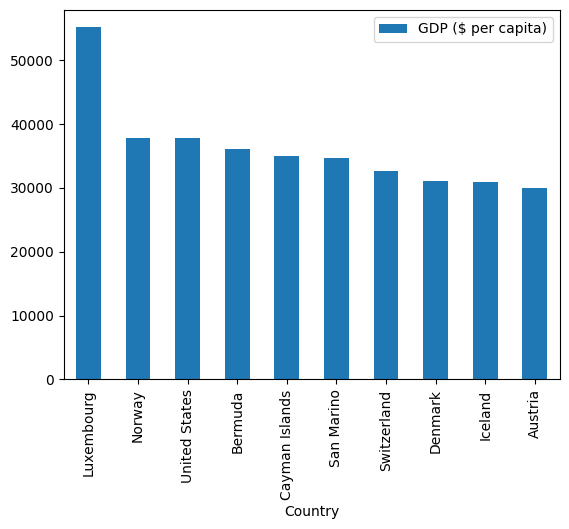

In [61]:
top_10_countries.plot(kind='bar');